<a href="https://colab.research.google.com/github/andrepegoraro/ds_churn/blob/main/desafio_ds_andre_pegoraro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Data Science - Abandono de Clientes
Candidato: André Pegoraro Neto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introdução

A resolução deste desafio possui por objetivo prever o _churn_ de um banco de dados fictício de uma instituição financeira. Os dados são fornecidos por um dataset designado para treinamento de um modelo preditivo. Em um segundo dataset, são fornecidos dados para teste deste mesmo modelo. Ao longo deste relatório, eu pretendo passar por todas as etapas de um projeto de DS, descrevendo seus procedimentos e comentando minhas impressões sobre os dados e sobre as decisões tomadas visando atingir o objetivo do modelo.

O _churn_ (ou a taxa de _churn_) é uma métrica que indica a quantidade de clientes que uma instituição perdeu em um determinado período de tempo. Logicamente, o objetivo de uma empresa é buscar reduzir o _churn_, de modo que não perca receita proveniente de nenhum cliente.

De acordo com Sicsú (2010, p. 3) modelos para prever o cancelamento voluntário de um cliente do cartão de crédito (_churning_) são modelos que utilizam as mesmas técnicas estatísticas que o credit scoring. Assim, de forma análoga ao que propõe Sicsú (2010), este modelo será construído de tal maneira. As etapas do projeto seguirão, quase que à risca, o que é proposto por Sicsú (2010), de forma a embasar a metodologia da resolução deste desafio.

## Planejamento do Modelo
### Objetivo do Estudo
Sicsú (2010, p. 15) esclarece que as primeiras etapas do desenvolvimento de modelos deste tipo são importantes para o sucesso do projeto, sendo a definição do escopo (objetivo que se espera alcançar) a primeira. O tipo de risco a ser avaliado, no caso deste projeto, está relacionado ao cliente e não a uma operação. O objetivo é se um cliente se tornará ou não um ex-cliente.

### Definição e Segmentação do Mercado-alvo
Depois, um passo seguinte seria a definição e segmentação do mercado-alvo, decisão que está fora do escopo deste projeto, uma vez que os dados já são disponibilizados pelo desafio. Mas vale ressaltar um ponto: Sicsú (2010) recomenda que, em mercados heterogêneos, construa-se modelos distintos para cada um dos segmentos presentes. Entretanto, o ganho em eficiência do modelo devido à segmentação tem como contrapartida o aumento do número de modelos de escoragem que deverão ser implantados e geridos pelo credor (Sicsu, 2010).

### Definição de bom e mau cliente
O modelo de previsão de _churn_ vai entregar um valor de probabilidade que define qual a chance de a instituição perder o cliente baseando-se nas informações disponibilizadas pelo dataset. Ou seja, é preciso estar ciente que o escore calculado com o modelo mede o risco de um cliente tornar-se mau, em função da definição de mau por ele adotada (Sicsú, 2010). Nesse caso, a definição (de o cliente ser mau ou bom) não está embasada em uma operação, e sim em ele se tornar um *churn* ou não.

Portanto:
- Bom cliente: permanece cliente, churn = 0;
- Mau cliente: deixa o banco, churn = 1.



## Identificação das Variáveis Previsoras
### Variáveis Potenciais
A identificação inicial das variáveis potenciais já foi feita pela seleção das variáveis presentes no dataset disponibilizado. Todas as variáveis presentes ali possuem o potencial de serem previsoras.

### Definição Operacional
A definição operacional de uma variável é vital para o desenvolvimento de um modelo, visto que garante a uniformidade na interpretação dos valores da variável. A definição a seguir é puramente julgamental, do meu entendimento do dataset. Com isso:
* **RowNumber**: número sequencial dos registros do dataset;
* **CustomerId**: identificador único para cada cliente do banco;
* **Surname**: sobrenome do cliente. Indica a que família pertence o cliente;
* **CreditScore**: escore de crédito do cliente;
* **Geography**: país de origem do cliente;
* **Gender**: gênero biológico do cliente (*male* ou *female*);
* **Age**: idade do cliente (em anos). Valor numérico, quantitativo;
* **Tenure**: após uma breve pesquisa para entender o significado do termo no contexto, _tenure_ se refere ao tempo em que o cliente está com o banco. Nesse caso, em anos;
* **Balance**: saldo da conta (em USD);
* **NumOfProducts**: o número de produtos financeiros associados ao cliente;
* **HasCrCard**: o cliente tem cartão de credito ou não. Tem = 1, Não tem = 0;
* **IsActiveMember**: o cliente tem sido ativo na conta (nos últimos "x" meses) ou não;
* **EstimatedSalary**: salário estimado do cliente, por ano (em USD);
* **Exited**: a variável _target_. Identifica se o cliente deixou o banco.




## Amostragem e Coleta de Dados
Nessa etapa do projeto, Sicsú (2010, p. 43) sugere duas formas de amostragem para os dados: amostragem aleatória simples e amostragem aleatória estratificada. Todavia, uma amostragem já foi fornecida, que é o dataset de trabalho disponibilizado para o desafio. Mas de maneira simples, a amostragem aleatória estratificada busca garantir um número mínimo de maus clientes na amostra, receio que pode ser verificado de forma simples.

### Ingestão de Dados

In [2]:
path = "/content/drive/MyDrive/desafio_ds_indicium/Abandono_clientes.csv"
dataframe = pd.read_csv(path, sep = ",")

In [3]:
churn_count = dataframe.groupby('Exited').size()
churn_df = churn_count.reset_index(name='Count')
churn_df["Percentage"] = (churn_df["Count"] / churn_df["Count"].sum()) * 100
print(churn_df)

   Exited  Count  Percentage
0       0   7963       79.63
1       1   2037       20.37


Potanto, segundo o que Sicsú (2010, p.45) recomenda, o número de maus clientes é suficientemente grande para que seja confiável, possuindo pelo menos 1000 maus clientes.

### Amostras de Desenvolvimento e Validação
Novamente, esta é uma etapa resumida pelas circunstâncias do desafio. A amostra de dados deve ser dividida em duas partes, uma para _training_ e outra para _testing_ do modelo. De acordo com Sicsú (2010, p. 46), reserva-se entre 50% e 70% da amostra original como amostra de _training_ e o restante como _testing_. O desafio deixou aproximadamente 91% para teste.

## EDA
A etapa da Análise Exploratória de Dados tem por objetivo conhecer o comportamento de cada variável e ter uma clara noção do perfil dos clientes que compõe o dataset (Sicsú, 2010, p. 49). Ainda, segundo o mesmo, nada substitui a sensibilidade de olhar para os dados e identificar eventuais problemas.


In [4]:
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataframe.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [7]:
dataframe.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
dataframe.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Análise Univariada

#### Distribuições de Frequências

Antes de iniciar a análise univariada, vou criar um dataset somente com os clientes churn

In [9]:
df_churn = dataframe[dataframe['Exited'] == 1]

##### Variáveis Qualitativas

In [10]:
geo_count = dataframe.groupby('Geography').size()
geo_df = geo_count.reset_index(name='Count')
geo_df["Percentage"] = (geo_df["Count"] / geo_df["Count"].sum()) * 100
geo_df.head()

,Geography,Count,Percentage
0,France,5014,50.14
1,Germany,2509,25.09
2,Spain,2477,24.77


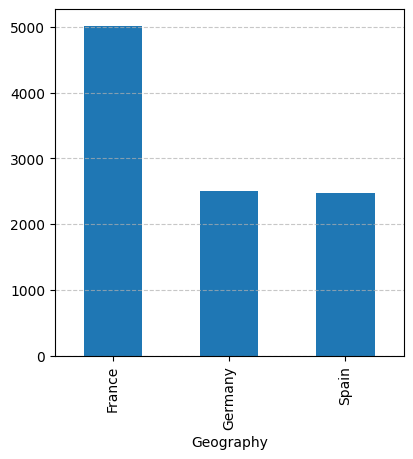

In [11]:
geo_freq = dataframe.groupby('Geography').size()
fig, ax = plt.subplots(figsize=(4.5, 4.5))
geo_freq.plot.bar(ax=ax)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Aproximadamente 50% dos clientes são da França, 25% da Alemanha e 25% da Espanha.

In [12]:
gender_count = dataframe.groupby('Gender').size()
gender_df = gender_count.reset_index(name='Count')
gender_df["Percentage"] = (gender_df["Count"] / gender_df["Count"].sum()) * 100
gender_df.head()

,Gender,Count,Percentage
0,Female,4543,45.43
1,Male,5457,54.57


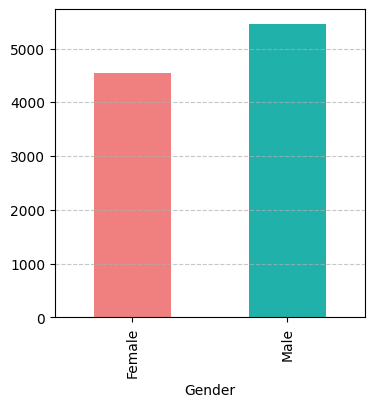

In [13]:
gender_freq = dataframe.groupby('Gender').size()
fig, ax = plt.subplots(figsize=(4, 4))
gender_freq.plot.bar(ax=ax, color=['lightcoral', 'lightseagreen'])
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A divisão de clientes por gênero é de aproximadamente 45% mulheres e 55% homens

In [14]:
card_count = dataframe.groupby('HasCrCard').size()
card_df = card_count.reset_index(name='Count')
card_df["Percentage"] = (card_df["Count"] / card_df["Count"].sum()) * 100
card_df.head()

,HasCrCard,Count,Percentage
0,0,2945,29.45
1,1,7055,70.55


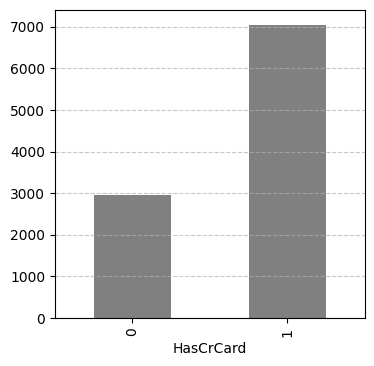

In [15]:
card_freq = dataframe.groupby('HasCrCard').size()
fig, ax = plt.subplots(figsize=(4, 4))
card_freq.plot.bar(ax=ax, color='grey')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Aproximadamente 70% dos clientes possuem cartão de crédito.

In [16]:
active_count = dataframe.groupby('IsActiveMember').size()
active_df = active_count.reset_index(name='Count')
active_df["Percentage"] = (active_df["Count"] / active_df["Count"].sum()) * 100
active_df.head()

,IsActiveMember,Count,Percentage
0,0,4849,48.49
1,1,5151,51.51


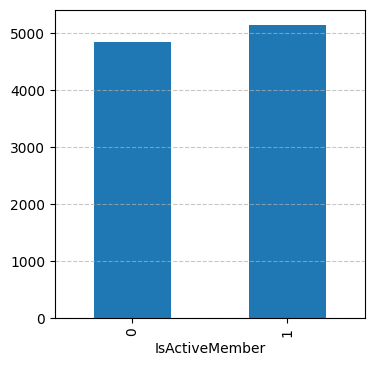

In [17]:
active_freq = dataframe.groupby('IsActiveMember').size()
fig, ax = plt.subplots(figsize=(4, 4))
active_freq.plot.bar(ax=ax)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Pode-se interpretar que metade dos clientes da amostra são ativos e metade não são.

##### Variáveis Quantitativas Contínuas

In [18]:
dataframe['CreditScore'].describe()

,CreditScore
count,10000.000000
mean,650.528800
std,96.653299
min,350.000000
25%,584.000000
50%,652.000000
75%,718.000000
max,850.000000


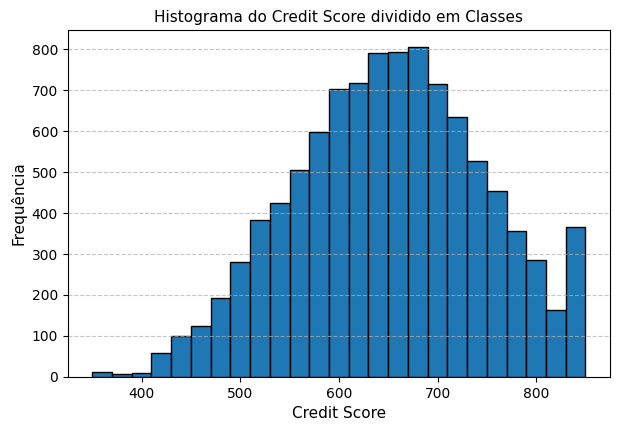

In [19]:
plt.figure(figsize=(7, 4.5))
plt.hist(dataframe['CreditScore'], bins=25, edgecolor='black')

plt.title('Histograma do Credit Score dividido em Classes', fontsize=11)
plt.xlabel('Credit Score', fontsize=11)
plt.ylabel('Frequência', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Transformando o CreditScore em uma variável discreta com várias classes, percebe-se como a última classe (que possui os maiores scores) foge à regra. Aqui há potenciais outliers que precisam ser posteriormente tratados no modelo.

In [20]:
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60+']
dataframe['AgeGroup'] = pd.cut(dataframe['Age'], bins=bins, labels=labels)

In [21]:
age_group_count = dataframe.groupby('AgeGroup').size()
age_group_df = age_group_count.reset_index(name='Count')
age_group_df["Percentage"] = (age_group_df["Count"] / age_group_df["Count"].sum()) * 100
age_group_df.head(6)

<ipython-input-21-ca4259beaa74>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_count = dataframe.groupby('AgeGroup').size()


,AgeGroup,Count,Percentage
0,0-18,22,0.22
1,18-30,1946,19.46
2,30-40,4451,44.51
3,40-50,2320,23.20
4,50-60,797,7.97
5,60+,464,4.64


<ipython-input-22-4a3b309ba1d9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_count = dataframe.groupby('AgeGroup').size()


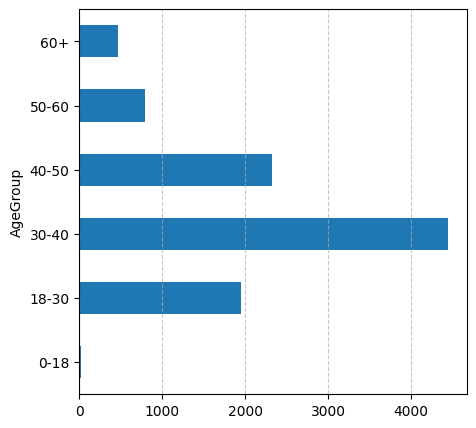

In [22]:
age_count = dataframe.groupby('AgeGroup').size()
fig, ax = plt.subplots(figsize=(5, 5))
age_count.plot.barh(ax=ax)
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

A maior parte dos clientes pertence ao grupo 30-40 (quase a metade), enquanto poquíssimos fazem parte do grupo 0-18 anos de idade (menos de 1%). Posteriormente, será avaliada a possibilidade da fusão de classes para este caso.

In [23]:
dataframe['Balance'].describe()

,Balance
count,10000.000000
mean,76485.889288
std,62397.405202
min,0.000000
25%,0.000000
50%,97198.540000
75%,127644.240000
max,250898.090000


O primeiro quartil da amostra de saldo bancário é igual a zero, o que significa que uma grande parte dos clientes não possui dinheiro na conta.

In [24]:
zero_balance_count = dataframe[dataframe['Balance'] == 0].shape[0]
total_count = dataframe.shape[0]
zero_balance_percentage = (zero_balance_count / total_count) * 100
print(f"Porcentagem de clientes com zero na conta: {zero_balance_percentage:.2f}%")

Porcentagem de clientes com zero na conta: 36.17%


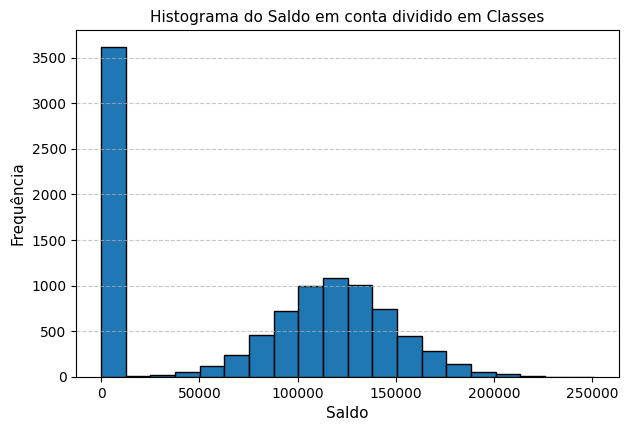

In [25]:
plt.figure(figsize=(7, 4.5))
plt.hist(dataframe['Balance'], bins=20, edgecolor='black')

plt.title('Histograma do Saldo em conta dividido em Classes', fontsize=11)
plt.xlabel('Saldo', fontsize=11)
plt.ylabel('Frequência', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Segundo Sicsú (2010, p. 59), considerando a definição de novas variáveis, juntamente com a discretização de variáveis, uma opção para a discrepância na distribuição dos dados de _Balance_ pode ser a separação dos clientes que possuem zero na conta em uma nova variável. Essa nova variável identificará se o cliente possui saldo ou não.

Outra opção é criar uma classe especificamente para esse tipo de cliente. Ou seja, juntamente com as classes discriminatórias do saldo, haverá uma última classe indicando salário zero na conta. A discretização de uma variável quantitativa permite entender com mais facilidade a relação dessa variável com o status (bom/mau) do cliente Sicsú (2010, p. 60).

In [26]:
dataframe['EstimatedSalary'].describe()

,EstimatedSalary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
25%,51002.110000
50%,100193.915000
75%,149388.247500
max,199992.480000


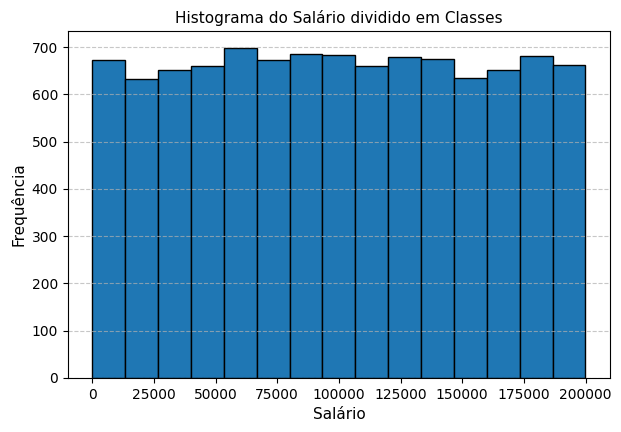

In [27]:
plt.figure(figsize=(7, 4.5))
plt.hist(dataframe['EstimatedSalary'], bins=15, edgecolor='black')

plt.title('Histograma do Salário dividido em Classes', fontsize=11)
plt.xlabel('Salário', fontsize=11)
plt.ylabel('Frequência', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

À primeira vista, em uma análise julgamental com divisão de 15 classes, não parece haver diferença significativa entre as frequências dos salários. Isso significa que o banco possui números semelhantes de clientes que recebem em diferentes faixas salariais. Talvez na análise bivariada possa haver uma diferença mais aparente entre os salários de bons e maus clientes.

##### Variáveis Quantitativas Discretas

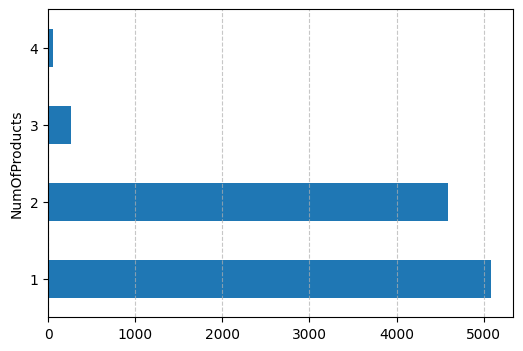

In [28]:
prod_freq = dataframe.groupby('NumOfProducts').size()
fig, ax = plt.subplots(figsize=(6, 4))
prod_freq.plot.barh(ax=ax)
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

A partir do gráfico, percebe-se que as categorias de NumOfProducts de 1 e 2 possuem frequência muito inferior às demais, 3 e 4. Sicsú (2010, p. 65) menciona que categorias com números pequenos de casos não são boas para modelos de credit scoring pois podem dar pesos a categorias representadas por poucos indivíduos. A técnica de fusão de variáveis será abordada na Análise bivariada.

In [29]:
tenure_count = dataframe.groupby('Tenure').size()
tenure_df = tenure_count.reset_index(name='Count')
tenure_df["Percentage"] = (tenure_df["Count"] / tenure_df["Count"].sum()) * 100
tenure_df.head(11)

,Tenure,Count,Percentage
0,0,413,4.13
1,1,1035,10.35
2,2,1048,10.48
3,3,1009,10.09
4,4,989,9.89
5,5,1012,10.12
6,6,967,9.67
7,7,1028,10.28
8,8,1025,10.25
9,9,984,9.84


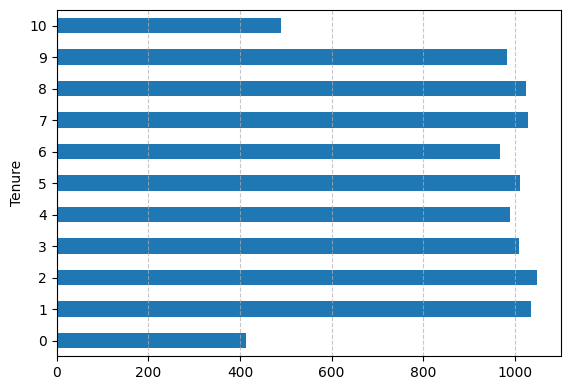

In [30]:
tenure_freq = dataframe.groupby('Tenure').size()
fig, ax = plt.subplots(figsize=(6.5, 4.5))
tenure_freq.plot.barh(ax=ax)
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

As distribuições de cada categoria da variável Tenure são muito semelhantes considerando todo o dataset. Na etapa de Análise Bivariada pode ficar mais claro se há classes que podem ser fundidas ou não nessa variável.

#### Identificação e Tratamento de Inconsistências

In [31]:
dataframe.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Até então, nenhum resultado aparenta ser "inacreditável" e não há valores negativos em variáveis quantitativas contínuas.

#### Identificação e Tratamento de Outliers

##### CreditScore

<Axes: ylabel='CreditScore'>

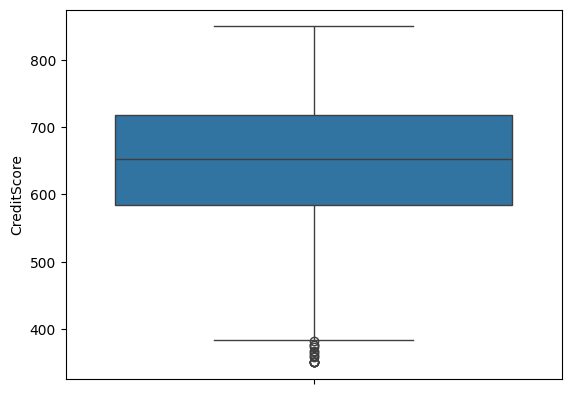

In [32]:
sns.boxplot(
    data=dataframe
    , y="CreditScore"
    # , hue="Exited"
    # , gap=.1
)

In [33]:
dataframe["CreditScore"].sort_values()

,CreditScore
8762,350
8723,350
1838,350
9624,350
1631,350
...,...
937,850
2980,850
960,850
3109,850


Agora é necessário entender quais valores são outliers. Por definição, os outliers podem ser identificados como os valores acima do upper bound ou abaixo do lower bound da variável. Nesse caso, em CreditScore, o boxplot só apontou valores abaixo do lower bound, portanto:

In [34]:
q_1 = dataframe['CreditScore'].quantile(0.25)
q_3 = dataframe['CreditScore'].quantile(0.75)
iqr = q_3 - q_1
lower_bound = q_1 - 1.5 * iqr
upper_bound = q_3 + 1.5 * iqr

print(lower_bound)

383.0


O lower_bound = 383. Dessa forma, qualquer valor abaixo disso é considerado um outlier. Sicsú (2010, p. 55) orienta que um dos procedimentos para tratamento de outliers é a substituição pelo menor ou maior valor não discrepante, 1º ou 99º percentis.

In [35]:
p_1 = dataframe['CreditScore'].quantile(0.01)
print(p_1)

432.0


Um questionamento que me surgiu durante essa etapa do desenvolvimento foi: o autor também orienta criar classes dentro de variáveis quantitativas contínuas, i.e., discretizar variáveis (Sicsú, 2010, p. 60) para ganhar explicabilidade no modelo. **Então se eu já vou discretizar a variável, ainda há necessidade de tratar os outliers? Eles já estarão presentes dentro de uma classe que os vai abranger, então ainda faz sentido o tratamento com os percentis?**

De qualquer forma, farei o tratamento.

In [36]:
# dataframe.loc[dataframe['CreditScore'] < p_1, 'CreditScore'] = p_1

<Axes: ylabel='CreditScore'>

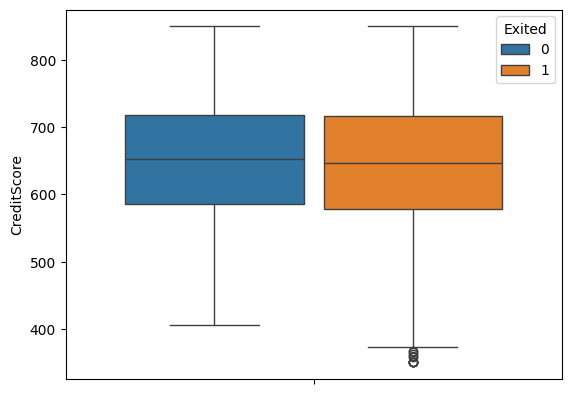

In [37]:
sns.boxplot(
    data=dataframe
    , y="CreditScore"
    , hue="Exited"
    , gap=.1
)

##### Balance

<Axes: ylabel='Balance'>

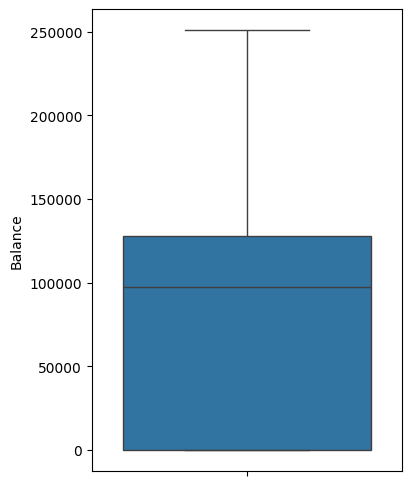

In [38]:
plt.figure(figsize=(4, 6))
sns.boxplot(y=dataframe["Balance"])

Não há outliers na variável Balance

##### Estimated Salary

<Axes: ylabel='EstimatedSalary'>

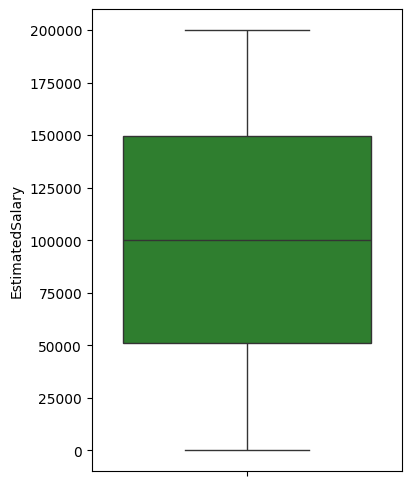

In [39]:
plt.figure(figsize=(4, 6))
sns.boxplot(data=dataframe,  y="EstimatedSalary", color="forestgreen")

Também não há outliers nos salários dos clientes do banco.

#### Identificação e Tratamento de Missing Values

Foi mostrado no início do projeto não haver valores nulos no dataset.

In [40]:
dataframe.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Definição de Novas Variáveis

### Discretização de Variáveis

### Análise Bivariada

Nesta etapa são exploradas as relações entre duas variáveis, mais espcecificamente a relação de cada variável preditora com a variável target e seu status (Sicsú, 2010, p. 69).

Na análise bivariada há basicamente três formas distintas de tabelas de contingência para visualização da distribuição de cada variável segundo o status de "Exited":
- Com frequências absolutas;
- Com frequências relativas (em porcentagem e por coluna);
- Com frequências relativas (em porcentagem, por linha).

#### Geography

In [41]:
geo_exited_df = pd.crosstab(index=dataframe['Geography'], columns=dataframe['Exited'])
geo_exited_df.columns = ['Not Exited (0)', 'Exited (1)']
geo_exited_df['Total'] = geo_exited_df.sum(axis=1)
geo_exited_df = geo_exited_df.reset_index()
geo_exited_df.head()

,Geography,Not Exited (0),Exited (1),Total
0,France,4204,810,5014
1,Germany,1695,814,2509
2,Spain,2064,413,2477


In [42]:
geo_exited_percent = geo_exited_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(geo_exited_df[['Not Exited (0)', 'Exited (1)', 'Total']].sum(axis=0), axis=1) * 100

total_row = pd.DataFrame(geo_exited_percent.sum(axis=0), columns=["Total"]).T
total_row.index = ["Total (%)"]

geo_exited_percent = pd.concat([geo_exited_df[['Geography']], geo_exited_percent], axis=1)
geo_exited_percent = pd.concat([geo_exited_percent, total_row], axis=0)
geo_exited_percent[['Not Exited (0)']] = geo_exited_percent[['Not Exited (0)']].round(2)
geo_exited_percent[['Exited (1)']] = geo_exited_percent[['Exited (1)']].round(2)
geo_exited_percent.head()

,Geography,Not Exited (0),Exited (1),Total
0,France,52.79,39.76,50.14
1,Germany,21.29,39.96,25.09
2,Spain,25.92,20.27,24.77
Total (%),NaN,100.00,100.00,100.00


In [43]:
geo_exited_percent_line = geo_exited_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(geo_exited_df['Total'], axis=0) * 100
geo_exited_percent_line = pd.concat([geo_exited_df[['Geography']], geo_exited_percent_line], axis=1)
geo_exited_percent_line[['Not Exited (0)']] = geo_exited_percent_line[['Not Exited (0)']].round(2)
geo_exited_percent_line[['Exited (1)']] = geo_exited_percent_line[['Exited (1)']].round(2)
geo_exited_percent_line.head()

,Geography,Not Exited (0),Exited (1),Total
0,France,83.85,16.15,100.0
1,Germany,67.56,32.44,100.0
2,Spain,83.33,16.67,100.0


A partir dessa última tabela foi possível compreender como clientes da Alemanha possuem maior **distribuição condicional** para o status de churn, ou seja, qual a probabilidade de um cliente ter saído do banco, dado que ele é da Alemanha.

- $P(Exited = 1 | Geography = Germany) = 0,324$

#### Gender

In [44]:
gender_exited_df = pd.crosstab(index=dataframe['Gender'], columns=dataframe['Exited'])
gender_exited_df.columns = ['Not Exited (0)', 'Exited (1)']
gender_exited_df['Total'] = gender_exited_df.sum(axis=1)
gender_exited_df = gender_exited_df.reset_index()

gender_exited_percent_line = gender_exited_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(gender_exited_df['Total'], axis=0) * 100
gender_exited_percent_line = pd.concat([gender_exited_df[['Gender']], gender_exited_percent_line], axis=1)
gender_exited_percent_line[['Not Exited (0)']] = gender_exited_percent_line[['Not Exited (0)']].round(2)
gender_exited_percent_line[['Exited (1)']] = gender_exited_percent_line[['Exited (1)']].round(2)
gender_exited_percent_line.head()

,Gender,Not Exited (0),Exited (1),Total
0,Female,74.93,25.07,100.0
1,Male,83.54,16.46,100.0


Há uma diferença significativa na proporção de homens e mulheres que deixam o banco.
- $P(Exited = 1 | Gender = Female) > P(Exited = 1 | Gender = Male)$

Isso pode ser melhor visualizado através de um gráfico, em que, de forma intuitiva, os verdes representam o total de clientes que permanecem no banco e os vermelhos representa os que se tornaram churn.

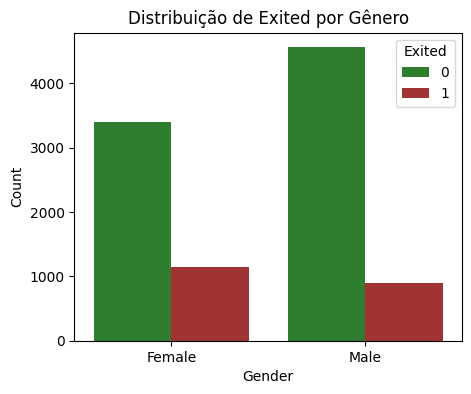

In [45]:
plt.figure(figsize=(5, 4))
sns.countplot(data=dataframe, x='Gender', hue='Exited', palette=['forestgreen', 'firebrick'])

plt.ylabel('Count')
plt.title('Distribuição de Exited por Gênero')
plt.show()

#### HasCrCard

In [46]:
card_exited_df = pd.crosstab(index=dataframe['HasCrCard'], columns=dataframe['Exited'])
card_exited_df.columns = ['Not Exited (0)', 'Exited (1)']
card_exited_df['Total'] = card_exited_df.sum(axis=1)
card_exited_df = card_exited_df.reset_index()

card_exited_percent_line = card_exited_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(card_exited_df['Total'], axis=0) * 100
card_exited_percent_line = pd.concat([card_exited_df[['HasCrCard']], card_exited_percent_line], axis=1)
card_exited_percent_line[['Not Exited (0)']] = card_exited_percent_line[['Not Exited (0)']].round(2)
card_exited_percent_line[['Exited (1)']] = card_exited_percent_line[['Exited (1)']].round(2)
card_exited_percent_line.head()

,HasCrCard,Not Exited (0),Exited (1),Total
0,0,79.19,20.81,100.0
1,1,79.82,20.18,100.0


Não há praticamente nenhuma influência se os clientes possuem crédito ou não para se tornarem churn.

#### IsActiveMember

In [47]:
active_exited_df = pd.crosstab(index=dataframe['IsActiveMember'], columns=dataframe['Exited'])
active_exited_df.columns = ['Not Exited (0)', 'Exited (1)']
active_exited_df['Total'] = active_exited_df.sum(axis=1)
active_exited_df = active_exited_df.reset_index()

active_exited_percent_line = active_exited_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(active_exited_df['Total'], axis=0) * 100
active_exited_percent_line = pd.concat([active_exited_df[['IsActiveMember']], active_exited_percent_line], axis=1)
active_exited_percent_line[['Not Exited (0)']] = active_exited_percent_line[['Not Exited (0)']].round(2)
active_exited_percent_line[['Exited (1)']] = active_exited_percent_line[['Exited (1)']].round(2)
active_exited_percent_line.head()

,IsActiveMember,Not Exited (0),Exited (1),Total
0,0,73.15,26.85,100.0
1,1,85.73,14.27,100.0


Diferentemente da variável anterior, agora, caso o cliente não seja ativo, possui maior probabilidade de deixar o banco:
- $P(Exited = 1 | IsActiveMember = 0) = 0.268$

####NumOfProducts

In [48]:
products_exited_df = pd.crosstab(index=dataframe['NumOfProducts'], columns=dataframe['Exited'])
products_exited_df.columns = ['Not Exited (0)', 'Exited (1)']
products_exited_df['Total'] = products_exited_df.sum(axis=1)
products_exited_df = products_exited_df.reset_index()
products_exited_df.head()

,NumOfProducts,Not Exited (0),Exited (1),Total
0,1,3675,1409,5084
1,2,4242,348,4590
2,3,46,220,266
3,4,0,60,60


In [49]:
products_exited_percent_line = products_exited_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(products_exited_df['Total'], axis=0) * 100
products_exited_percent_line = pd.concat([products_exited_df[['NumOfProducts']], products_exited_percent_line], axis=1)
products_exited_percent_line[['Not Exited (0)']] = products_exited_percent_line[['Not Exited (0)']].round(2)
products_exited_percent_line[['Exited (1)']] = products_exited_percent_line[['Exited (1)']].round(2)
products_exited_percent_line.head()

,NumOfProducts,Not Exited (0),Exited (1),Total
0,1,72.29,27.71,100.0
1,2,92.42,7.58,100.0
2,3,17.29,82.71,100.0
3,4,0.00,100.00,100.0


#### Tenure

É necessário primeiro conferir a frequência total dentro de cada classe. O interessante é garantir 500 clientes em cada classe, como recomendado por Sicsú (2010, p. 64).

In [50]:
tenure_exited_df = pd.crosstab(index=dataframe['Tenure'], columns=dataframe['Exited'])
tenure_exited_df.columns = ['Not Exited (0)', 'Exited (1)']
tenure_exited_df['Total'] = tenure_exited_df.sum(axis=1)
tenure_exited_df = tenure_exited_df.reset_index()
tenure_exited_df.head(12)

,Tenure,Not Exited (0),Exited (1),Total
0,0,318,95,413
1,1,803,232,1035
2,2,847,201,1048
3,3,796,213,1009
4,4,786,203,989
5,5,803,209,1012
6,6,771,196,967
7,7,851,177,1028
8,8,828,197,1025
9,9,771,213,984


Tenure = 0 e Tenure = 10 possuem frequência inferior a 500.

In [51]:
tenure_exited_percent_line = tenure_exited_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(tenure_exited_df['Total'], axis=0) * 100
tenure_exited_percent_line = pd.concat([tenure_exited_df[['Tenure']], tenure_exited_percent_line], axis=1)
tenure_exited_percent_line[['Not Exited (0)']] = tenure_exited_percent_line[['Not Exited (0)']].round(2)
tenure_exited_percent_line[['Exited (1)']] = tenure_exited_percent_line[['Exited (1)']].round(2)
tenure_exited_percent_line.head(12)

,Tenure,Not Exited (0),Exited (1),Total
0,0,77.00,23.00,100.0
1,1,77.58,22.42,100.0
2,2,80.82,19.18,100.0
3,3,78.89,21.11,100.0
4,4,79.47,20.53,100.0
5,5,79.35,20.65,100.0
6,6,79.73,20.27,100.0
7,7,82.78,17.22,100.0
8,8,80.78,19.22,100.0
9,9,78.35,21.65,100.0


Mais uma variável sem diferença significativa na distribuição condicional de churn

Explicar a diferença entre o B/M e o WOE

Usar AID para discretização de variáveis contínuas, WOE para fusão de classes e SHAP depois para interpretar o modelo e avaliar a contribuição de cada feature.

#### Credit Score Discretization

Para esta etapa, de discretização de variáveis quantitativas, seguirei 3 abordagens distintas com o objetivo de comparar seus desempenhos. Sicsú (2010, p. 63-65) recomenda o uso de percentis, o método julgamental e o método AID (Automatic Interaction Detection)

##### Equal-Width Binning

In [52]:
dataframe['WidthCreditScore'] = pd.cut(dataframe['CreditScore'], bins=7, labels=False)

In [53]:
w_credit_df = pd.crosstab(index=dataframe['WidthCreditScore'], columns=dataframe['Exited'])
w_credit_df.columns = ['Not Exited (0)', 'Exited (1)']
w_credit_df['Total'] = w_credit_df.sum(axis=1)
w_credit_df = w_credit_df.reset_index()
w_credit_df.head(10)

,WidthCreditScore,Not Exited (0),Exited (1),Total
0,0,29,31,60
1,1,379,101,480
2,2,1120,312,1432
3,3,1887,491,2378
4,4,2262,539,2801
5,5,1501,367,1868
6,6,785,196,981


##### KMeans-Based Binning

In [54]:
from sklearn.preprocessing import KBinsDiscretizer

In [55]:
k_bins = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='kmeans')
dataframe['K_CreditScore'] = k_bins.fit_transform(dataframe[['CreditScore']]).astype(int)

In [56]:
bin_edges = k_bins.bin_edges_[0]
print(f"Bin edges:\n {bin_edges}")

Bin edges:
 [350.         493.86712127 559.20291038 614.81606447 667.12232764
 722.3844943  786.9297299  850.        ]


In [57]:
k_credit_df = pd.crosstab(index=dataframe['K_CreditScore'], columns=dataframe['Exited'])
k_credit_df.columns = ['Not Exited (0)', 'Exited (1)']
k_credit_df['Total'] = k_credit_df.sum(axis=1)
k_credit_df = k_credit_df.reset_index()
k_credit_df.head(10)

,K_CreditScore,Not Exited (0),Exited (1),Total
0,0,418,134,552
1,1,1019,286,1305
2,2,1362,350,1712
3,3,1633,420,2053
4,4,1652,372,2024
5,5,1193,307,1500
6,6,686,168,854


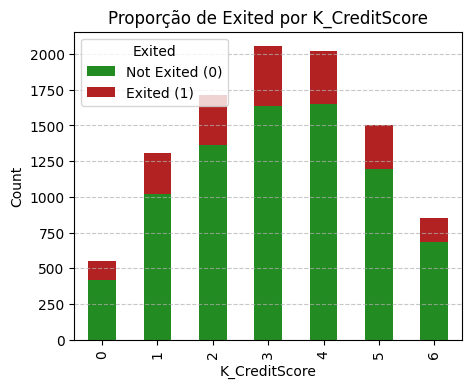

In [58]:
credit_group_exited = dataframe.groupby(['K_CreditScore', 'Exited']).size().unstack()

fig, ax = plt.subplots(figsize=(5, 4))
credit_group_exited.plot(kind='bar', stacked=True, color=['forestgreen', 'firebrick'], ax=ax)

ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylabel('Count')
ax.set_title('Proporção de Exited por K_CreditScore')

plt.legend(title='Exited', labels=['Not Exited (0)', 'Exited (1)'])
plt.show()

In [59]:
k_credit_percent = k_credit_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(k_credit_df['Total'], axis=0) * 100
k_credit_percent = pd.concat([k_credit_df[['K_CreditScore']], k_credit_percent], axis=1)
k_credit_percent[['Not Exited (0)']] = k_credit_percent[['Not Exited (0)']].round(2)
k_credit_percent[['Exited (1)']] = k_credit_percent[['Exited (1)']].round(2)
k_credit_percent.head(10)

,K_CreditScore,Not Exited (0),Exited (1),Total
0,0,75.72,24.28,100.0
1,1,78.08,21.92,100.0
2,2,79.56,20.44,100.0
3,3,79.54,20.46,100.0
4,4,81.62,18.38,100.0
5,5,79.53,20.47,100.0
6,6,80.33,19.67,100.0


##### Percentile-Based Binning

In [60]:
dataframe['PercentileCreditScore'] = pd.qcut(dataframe['CreditScore'], q=10, labels=False)

In [61]:
p_credit_df = pd.crosstab(index=dataframe['PercentileCreditScore'], columns=dataframe['Exited'])
p_credit_df.columns = ['Not Exited (0)', 'Exited (1)']
p_credit_df['Total'] = p_credit_df.sum(axis=1)
p_credit_df = p_credit_df.reset_index()
p_credit_df.head(10)

,PercentileCreditScore,Not Exited (0),Exited (1),Total
0,0,778,224,1002
1,1,780,228,1008
2,2,792,198,990
3,3,807,223,1030
4,4,796,209,1005
5,5,819,186,1005
6,6,807,171,978
7,7,811,192,1003
8,8,788,210,998
9,9,785,196,981


In [62]:
p_credit_percent = p_credit_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(p_credit_df['Total'], axis=0) * 100
p_credit_percent = pd.concat([p_credit_df[['PercentileCreditScore']], p_credit_percent], axis=1)
p_credit_percent[['Not Exited (0)']] = p_credit_percent[['Not Exited (0)']].round(2)
p_credit_percent[['Exited (1)']] = p_credit_percent[['Exited (1)']].round(2)
p_credit_percent.head(10)

,PercentileCreditScore,Not Exited (0),Exited (1),Total
0,0,77.64,22.36,100.0
1,1,77.38,22.62,100.0
2,2,80.00,20.00,100.0
3,3,78.35,21.65,100.0
4,4,79.20,20.80,100.0
5,5,81.49,18.51,100.0
6,6,82.52,17.48,100.0
7,7,80.86,19.14,100.0
8,8,78.96,21.04,100.0
9,9,80.02,19.98,100.0


##### AID - CART  Based Binning

In [63]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=500) # A profundidade influencia o fit dos dados. Mais profundo, maior tendência a overfitting.
tree.fit(dataframe[['CreditScore']], dataframe['Exited'])

thresholds = np.sort(tree.tree_.threshold[tree.tree_.threshold > 0])
print("Cortes definidos pelo AID:", thresholds)

Cortes definidos pelo AID: [489.5 523.5 552.5 651.5 664.5 678.5 703.5 734.5 771.5 811.5]


In [64]:
def credit_bins(value):
    for i, threshold in enumerate(thresholds):
        if value <= threshold:
            return f"credit_{i+1}"
    return f"credit_{len(thresholds) + 1}"

dataframe['AID_CreditScore'] = dataframe['CreditScore'].apply(credit_bins)
dataframe[['CreditScore', 'AID_CreditScore']].head(5)

,CreditScore,AID_CreditScore
0,619,credit_4
1,608,credit_4
2,502,credit_2
3,699,credit_7
4,850,credit_11


In [65]:
aid_credit_df = pd.crosstab(index=dataframe['AID_CreditScore'], columns=dataframe['Exited'])
aid_credit_df.columns = ['Not Exited (0)', 'Exited (1)']
aid_credit_df['Total'] = aid_credit_df.sum(axis=1)
aid_credit_df = aid_credit_df.reset_index()
aid_credit_df.head(15)

,AID_CreditScore,Not Exited (0),Exited (1),Total
0,credit_1,377,125,502
1,credit_10,511,113,624
2,credit_11,406,105,511
3,credit_2,426,104,530
4,credit_3,477,150,627
5,credit_4,2633,695,3328
6,credit_5,421,90,511
7,credit_6,438,104,542
8,credit_7,782,162,944
9,credit_8,816,195,1011


In [66]:
aid_credit_percent = aid_credit_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(aid_credit_df['Total'], axis=0) * 100
aid_credit_percent = pd.concat([aid_credit_df[['AID_CreditScore']], aid_credit_percent], axis=1)
aid_credit_percent[['Not Exited (0)']] = aid_credit_percent[['Not Exited (0)']].round(2)
aid_credit_percent[['Exited (1)']] = aid_credit_percent[['Exited (1)']].round(2)
aid_credit_percent.head(10)
# aid_credit_percent.sort_values(by='Exited (1)').head(10)

,AID_CreditScore,Not Exited (0),Exited (1),Total
0,credit_1,75.10,24.90,100.0
1,credit_10,81.89,18.11,100.0
2,credit_11,79.45,20.55,100.0
3,credit_2,80.38,19.62,100.0
4,credit_3,76.08,23.92,100.0
5,credit_4,79.12,20.88,100.0
6,credit_5,82.39,17.61,100.0
7,credit_6,80.81,19.19,100.0
8,credit_7,82.84,17.16,100.0
9,credit_8,80.71,19.29,100.0


Credit Score não varia monotonicamente, portanto tem menor explicabilidade. Mas vale ressaltar que o Credit Score é uma função provavelmente correlacionada com as demais variáveis.

##### Correlação de Spearman

In [67]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(dataframe['CreditScore'], dataframe['Exited'])
print(f"Correlação de Spearman: {corr:.3f}, p-value: {p_value:.5f}")

Correlação de Spearman: -0.023, p-value: 0.01986


Estatisticamente significativa (p-valor < 0,05) mas com pouca significância.

In [68]:
corr, p_value = spearmanr(dataframe['AID_CreditScore'], dataframe['Exited'])
print(f"Correlação de Spearman: {corr:.3f}, p-value: {p_value:.5f}")

Correlação de Spearman: -0.016, p-value: 0.11359


#### Estimated Salary

##### AID - CART Based Binning

In [69]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=500)
tree.fit(dataframe[['EstimatedSalary']], dataframe['Exited'])

thresholds = np.sort(tree.tree_.threshold[tree.tree_.threshold > 0])
print("Cortes definidos pelo AID:", thresholds)

Cortes definidos pelo AID: [ 73970.19921875  83463.53515625  94645.38671875 106162.08984375
 122137.84765625 138559.96875    169420.421875  ]


In [70]:
def salary_bins(value):
    for i, threshold in enumerate(thresholds):
        if value <= threshold:
            return f"salary_{i+1}"
    return f"salary_{len(thresholds) + 1}"

dataframe['AID_EstimatedSalary'] = dataframe['EstimatedSalary'].apply(salary_bins)

In [71]:
aid_salary_df = pd.crosstab(index=dataframe['AID_EstimatedSalary'], columns=dataframe['Exited'])
aid_salary_df.columns = ['Not Exited (0)', 'Exited (1)']
aid_salary_df['Total'] = aid_salary_df.sum(axis=1)
aid_salary_df = aid_salary_df.reset_index()
aid_salary_df.head(10)

,AID_EstimatedSalary,Not Exited (0),Exited (1),Total
0,salary_1,2917,745,3662
1,salary_2,423,78,501
2,salary_3,450,130,580
3,salary_4,498,96,594
4,salary_5,610,184,794
5,salary_6,680,153,833
6,salary_7,1184,310,1494
7,salary_8,1201,341,1542


In [72]:
aid_salary_percent = aid_salary_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(aid_salary_df['Total'], axis=0) * 100
aid_salary_percent = pd.concat([aid_salary_df[['AID_EstimatedSalary']], aid_salary_percent], axis=1)
aid_salary_percent[['Not Exited (0)']] = aid_salary_percent[['Not Exited (0)']].round(2)
aid_salary_percent[['Exited (1)']] = aid_salary_percent[['Exited (1)']].round(2)
aid_salary_percent.head(10)
# aid_salary_percent.sort_values(by='Exited (1)').head(10)

,AID_EstimatedSalary,Not Exited (0),Exited (1),Total
0,salary_1,79.66,20.34,100.0
1,salary_2,84.43,15.57,100.0
2,salary_3,77.59,22.41,100.0
3,salary_4,83.84,16.16,100.0
4,salary_5,76.83,23.17,100.0
5,salary_6,81.63,18.37,100.0
6,salary_7,79.25,20.75,100.0
7,salary_8,77.89,22.11,100.0


In [73]:
corr, p_value = spearmanr(dataframe['EstimatedSalary'], dataframe['Exited'])
print(f"Spearman Correlation: {corr:.3f}, p-value: {p_value:.5f}")

Spearman Correlation: 0.012, p-value: 0.22707


#### Age

##### AID - CART Based Binning

In [74]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=500)
tree.fit(dataframe[['Age']], dataframe['Exited'])

thresholds = np.sort(tree.tree_.threshold[tree.tree_.threshold > 0])
print("Cortes definidos pelo AID:", thresholds)

Cortes definidos pelo AID: [34.5 38.5 40.5 42.5 46.5 59.5]


In [75]:
def age_bins(value):
    for i, threshold in enumerate(thresholds):
        if value <= threshold:
            return f"age_{i+1}"
    return f"age_{len(thresholds) + 1}"

dataframe['AID_Age'] = dataframe['Age'].apply(age_bins)

In [76]:
aid_age_df = pd.crosstab(index=dataframe['AID_Age'], columns=dataframe['Exited'])
aid_age_df.columns = ['Not Exited (0)', 'Exited (1)']
aid_age_df['Total'] = aid_age_df.sum(axis=1)
aid_age_df = aid_age_df.reset_index()
aid_age_df.head(15)

,AID_Age,Not Exited (0),Exited (1),Total
0,age_1,3389,290,3679
1,age_2,1650,235,1885
2,age_3,694,161,855
3,age_4,541,146,687
4,age_5,670,339,1009
5,age_6,640,719,1359
6,age_7,379,147,526


In [77]:
aid_age_percent = aid_age_df[['Not Exited (0)', 'Exited (1)', 'Total']].div(aid_age_df['Total'], axis=0) * 100
aid_age_percent = pd.concat([aid_age_df[['AID_Age']], aid_age_percent], axis=1)
aid_age_percent[['Not Exited (0)']] = aid_age_percent[['Not Exited (0)']].round(2)
aid_age_percent[['Exited (1)']] = aid_age_percent[['Exited (1)']].round(2)
aid_age_percent.head(15)
# aid_age_percent.sort_values(by="Exited (1)").head(15)

,AID_Age,Not Exited (0),Exited (1),Total
0,age_1,92.12,7.88,100.0
1,age_2,87.53,12.47,100.0
2,age_3,81.17,18.83,100.0
3,age_4,78.75,21.25,100.0
4,age_5,66.40,33.60,100.0
5,age_6,47.09,52.91,100.0
6,age_7,72.05,27.95,100.0


A idade tem explicabilidade, varia monotonicamente, apesar de que na última categoria há uma proporção de churn menor comparada à anterior

#### Balance

##### AID - CART Based Binning

### Correlação

Spearman para avaliar relações monotônicas

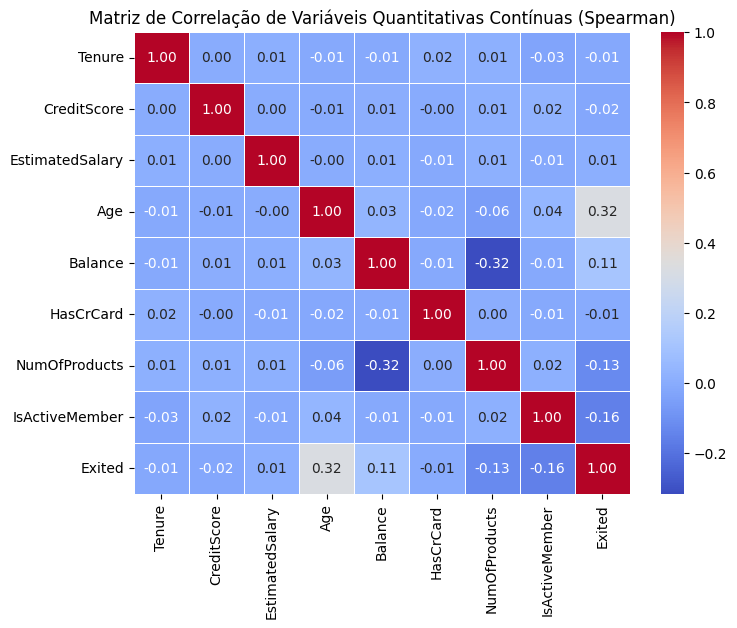

In [78]:
corr_matrix = dataframe[['Tenure', 'CreditScore', 'EstimatedSalary', 'Age', 'Balance', 'HasCrCard', 'NumOfProducts', 'IsActiveMember', 'Exited']].corr(method="spearman")

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlação de Variáveis Quantitativas Contínuas (Spearman)")
plt.show()